# Defining the Problem

**This project aims to predict credit card customer default payments in the next month**

Early detection of default payments would help financial institution on risk assessment and provide an objective decision making for the following:

+ Approval for future increase or decrease in credit facilities
+ Interest rates based on customer risk
+ Identify potential debt repayment schemes for targeted customers

We will work with a dataset containing information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

[Documentation](https://archive-beta.ics.uci.edu/ml/datasets/default+of+credit+card+clients#Descriptive)


+ ***LIMIT_BAL Amount of the given credit (NT dollar):*** it includes both the individual consumer credit and his/her family (supplementary) credit.

+ ***SEX: Gender***: (1 = male; 2 = female).

+ ***EDUCATION: Education***:(1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).

+ ***MARRIAGE Marital status***: (1 = married; 2 = single; 3 = divorce; 0=others).

+ ***AGE: Age***: (year).

+ ***PAY_0 - PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:***: PAY_0 = the repayment status in September, 2005; PAY_3 = the repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005. ***The measurement scale for the repayment status is:***-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

+ ***BILL_AMT1-BILL_AMT6 Amount of bill statement (NT dollar).*** BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005.

+ ***PAY_AMT1-PAY_AMT2: Amount of previous payment (NT dollar).***: PAY_AMT1 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;PAY_AMT2 = amount paid in April, 2005.

+ ***default payment next month (Y)***: client's behavior; Y=0 then not default, Y=1 then default"

# Libs

In [64]:
import pandas as pd 
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# EDA

## First look at the data

In [65]:
# Loading de DataFrame

default_credit_card = pd.read_excel(r'data\default of credit card clients.xls', skiprows =1)
pd.set_option('display.max_columns', 25)
default_credit_card.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [66]:
# Taking a quick look at the features

display(default_credit_card.describe().T)
default_credit_card.info()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

***We Don't have missing data and the data types looks right. But some features draw attention:***
+ EDUCATION -- We have 6 categories, but 75% of values are included in only tree categories.
+ MARRIAGE -- Something similar happens, categories 0 and 3 may not have much values
+ Age -- it seems that age is concentrated in young people, maybe this feature is skewed
+ LIMIT_BAL -- The max value (1000000.0) is 4x bigger then 75% of values, we may have to deal with some outliers. 

***We also noted that the columns name can be improved. First, lets standardize the names in snake_case, then, we can rename PAY_0 to PAY_1, just to keep the same notation through features. We don't need the column 'id' either*** 


In [67]:
# Renaming Columns

default_credit_card_2 = default_credit_card.copy()

for col in default_credit_card_2.columns:
    default_credit_card_2.rename(columns = {col:col.lower().strip().replace(' ','_')},inplace = True)

default_credit_card_2.rename(columns = {'pay_0':'pay_1'}, inplace = True)
default_credit_card_2.drop('id',axis = 1,inplace = True)
default_credit_card_2.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default_payment_next_month'],
      dtype='object')

***Before start exploring the features, lets take a look at default_payment_next_month, the variable that we want to predict!***

In [68]:
default_count = default_credit_card_2.default_payment_next_month.value_counts()

default_count

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

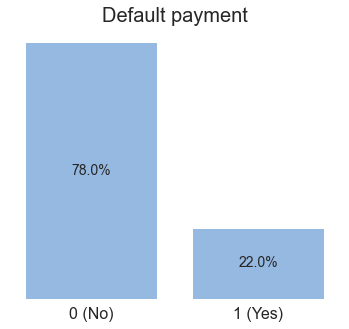

In [232]:
# Visualizing target distribution

sns.set_style('white')
fig, ax1 = plt.subplots(figsize=(6,5))

default_percentage = [round(default_count[0]/len(default_credit_card_2),2),
                      round(default_count[1]/len(default_credit_card_2),2)]

sns.barplot(y=default_percentage,
            x=['0 (No)','1 (Yes)'],
            color ='#8ab8ed',lw =3, ax = ax1)


# Showing %values inside bars
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax1.text(x+width/2, y+height/2,
             f'{round(100*height,2)}%',
             fontsize =14, horizontalalignment='center',
             verticalalignment='center')

ax1.set(yticklabels=[])
ax1.set_title("Default payment",fontsize = 20)
ax1.tick_params(labelsize=16)
sns.despine(bottom = True, left = True)
plt.show()

***We have imbalanced data! We will have to deal with this to train the model. But for now, lets analyze the others features, choose what makes sense to keep, what makes sense to transform and what to delete***

## Age

***As noted before, Age may be skewed. So lets start investigating it***

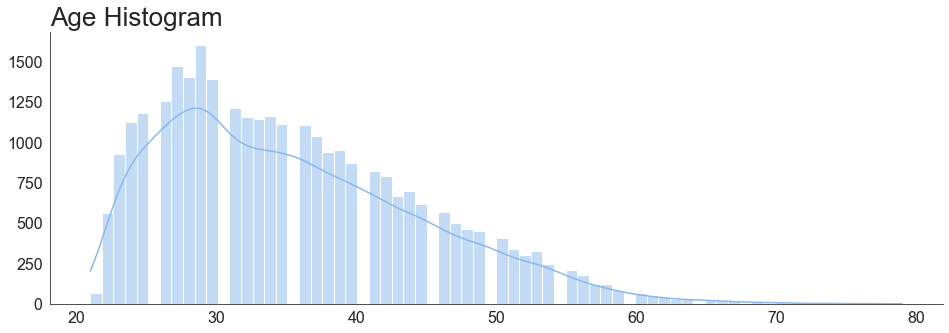

In [239]:
# Visualizing age distribution

fig, ax1 = plt.subplots(figsize=(16,5))

sns.histplot(data=default_credit_card_2,
             x=default_credit_card_2.age,
             color ='#8ab8ed', kde = True,ax = ax1)

ax1.set_title("Age Histogram",fontsize = 26,loc = 'left')
ax1.tick_params(labelsize=16)
ax1.set_ylabel("")
ax1.set_xlabel("")
sns.despine()
plt.show()

***Age is definitely skewed! therefore, to better understand customer behavior based on age, it may be a good idea to create age groups based on percentiles. Lets do this***

In [113]:
# We will divide the ages in 10 groups based on percentiles

# Let's create a list to nominate ages ranges 
percentil_list = [round(np.percentile(default_credit_card_2.age, i ),2)
                  for i in range(0,105,5)]
range_labels = [str(int(i)) + '-'+ str(int(j)) 
                for i,j in zip(percentil_list[:-1],percentil_list[1:])]

# Ages ranges by percentil 
default_credit_card_2['age_range'] = pd.qcut(default_credit_card_2.age,20,range_labels )
# Looking the results
default_credit_card_2.loc[:,default_credit_card_2.columns[:5].tolist() + ['age_range']].sample(3)

,limit_bal,sex,education,marriage,age,age_range
5428,100000,1,2,1,42,41-43
11403,20000,2,2,1,37,35-37
729,60000,1,1,2,29,28-29


In [114]:
# To visualize the data and understand if it really make sense to divede ages in age ranges, lets create two summaries:

# Summary basede on age range (groups)
summary_by_age_range = default_credit_card_2.groupby('age_range',as_index = False).default_payment_next_month.mean()
# Summary based on normal age
summary_by_age = default_credit_card_2.groupby('age',as_index = False).default_payment_next_month.mean()

print(f'summary_by_age_range shape: {summary_by_age_range.shape}'
      f'\nsummary_by_age shape: {summary_by_age.shape}')

summary_by_age_range shape: (20, 2)
summary_by_age shape: (56, 2)


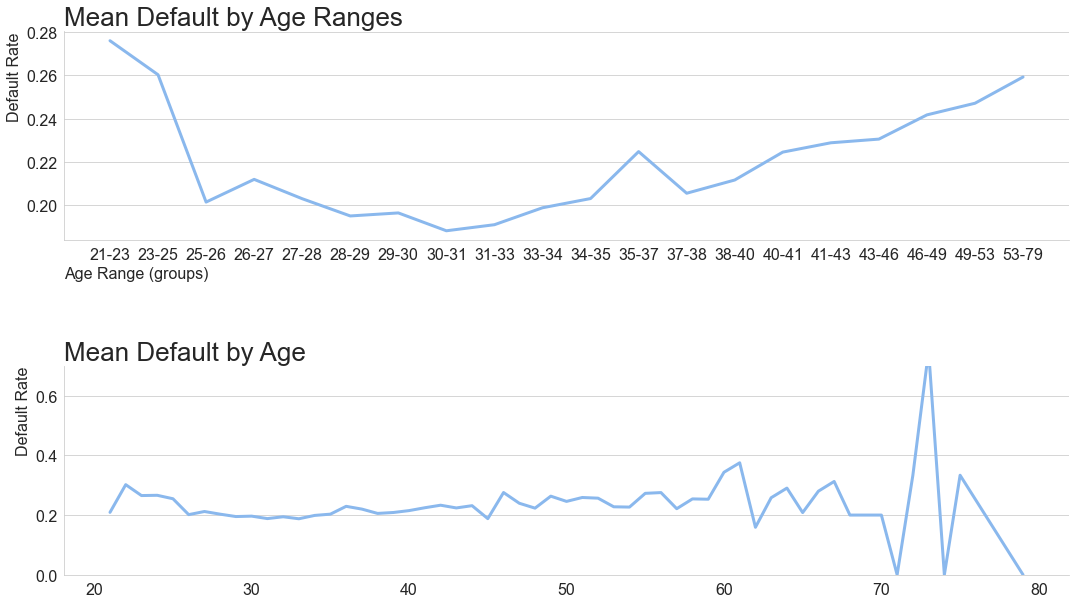

In [244]:
# Now, lets visualize the data

with sns.axes_style('whitegrid'):
    fig, (ax1,ax2) = plt.subplots(2,1,figsize=(18,10))

    # Fig 1
    sns.lineplot(y=summary_by_age_range.default_payment_next_month,
                x=summary_by_age_range.age_range,
                color ='#8ab8ed',lw =3, ax = ax1)

    ax1.set_title("Mean Default by Age Ranges",fontsize = 26, loc = 'left')
    ax1.tick_params(labelsize=16)
    ax1.set_ylabel("Default Rate",fontsize=16,loc = 'top')
    ax1.set_xlabel("Age Range (groups)",fontsize=16,loc = 'left')
    ax1.xaxis.grid(False)

    # Fig 2
    sns.lineplot(y=summary_by_age.default_payment_next_month,
                x=summary_by_age.age,
                color ='#8ab8ed',lw =3, ax = ax2)

    ax2.set_title("Mean Default by Age",fontsize = 26, loc = 'left')
    ax2.tick_params(labelsize=16)
    ax2.set_ylabel("Default Rate",fontsize=16,loc = 'top')
    ax2.set_xlabel("",fontsize=16)
    plt.subplots_adjust(hspace = 0.6)
    ax2.xaxis.grid(False)
    plt.ylim(0,0.7)
    sns.despine()
    plt.show()

***When using Age ranges, we can definitely identify a behavior. Young and old customers have a higher rate of default. But when we look at the summary by age, without ranges, it is very hard to find a pattern. this shows that our hypothesis was correct, it seems to be a good idea to use age ranges instead of ages***

### Age - Feature Engineering

We created a feature that consist in age ranges, grouped by percentiles. But to use those categorical values in our future model, we will need to adapt it to numerical. 

It also seems like a good idea to set the numerical values in a rank order, i.e, the category 1 will represent the age range with lowest default, and the category 20 (last one) will represent the age range with highest default. 

lets do it! 

In [75]:
# fist, lets rank our previously created summary by age range by default

summary_by_age_range_ranked = summary_by_age_range.copy()
summary_by_age_range_ranked.sort_values(by =['default_payment_next_month'], inplace = True)

#Now we can create ou numerical feature
summary_by_age_range_ranked['age_range_int'] = [i for i in range(1, len(summary_by_age_range_ranked) +1)]
summary_by_age_range_ranked.reset_index(drop = True, inplace = True)

In [105]:
# Checking Feature "age_range_int"

summary_by_age_range_ranked

,age_range,default_payment_next_month,age_range_int
0,30-31,0.188168,1
1,31-33,0.190972,2
2,28-29,0.195016,3
3,29-30,0.196416,4
4,33-34,0.198795,5
5,25-26,0.201433,6
6,27-28,0.202981,7
7,34-35,0.203055,8
8,37-38,0.205508,9
9,38-40,0.211623,10


In [77]:
# Now we just need to add this feature to the main df

default_credit_card_3 = default_credit_card_2.copy()

default_credit_card_3['age_range_int'] = default_credit_card_3['age_range'].apply(
    lambda x: summary_by_age_range_ranked[summary_by_age_range_ranked.age_range == x].age_range_int.values[0])

default_credit_card_3.sample(3)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month,age_range,age_range_int
18135,10000,1,3,2,46,3,2,2,3,3,3,1050,...,1050,1050,1050,0,0,0,0,0,0,1,43-46,15
5167,200000,1,3,1,40,0,0,0,0,0,0,187431,...,76167,76810,72039,8124,8339,5004,2961,2579,2761,0,38-40,10
17390,360000,2,1,1,42,1,-2,-2,-2,-2,-2,0,...,0,0,0,0,0,0,0,0,0,0,41-43,14


## Sex

In [78]:
# To analyze the gender feature, lets start with the Default Rate

sex_df = default_credit_card_3.groupby('sex',as_index = False).agg({'default_payment_next_month':'mean'})
sex_df['Not Default'] = 1 - sex_df['default_payment_next_month']
sex_df['sex'] =['Male', 'Female']
sex_df.set_index('sex',inplace = True)
sex_df.rename(columns = {'default_payment_next_month':'Default'}, inplace = True)
sex_df

,Default,Not Default
sex,,
Male,0.241672,0.758328
Female,0.207763,0.792237


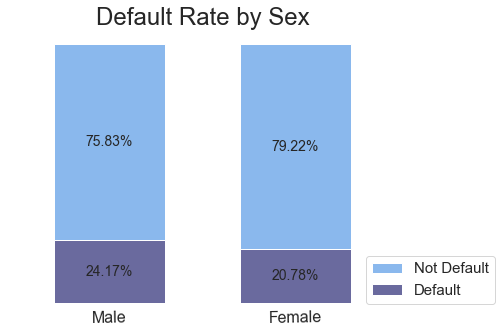

In [228]:
# Visualizing with a stacked bar plot

fig, ax1 = plt.subplots(figsize=(7,5))

sex_df.plot( kind='bar', stacked=True,color = ['#6a6a9e','#8ab8ed'],width = 0.6, ax = ax1)
ax1.set_title("Default Rate by Sex",fontsize = 24)
ax1.tick_params(labelrotation = 1,labelsize=16)
ax1.set_ylabel("")
ax1.set_xlabel("")

# Adjusting Legend order and location
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 0] 
plt.legend([handles[i] for i in order], [labels[i] for i in order],fontsize = 15,bbox_to_anchor=(0.9, 0.2))

# Showing %values inside bars
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax1.text(x+width/2, y+height/2,
             f'{round(100*height,2)}%',
             fontsize =14, horizontalalignment='center',
             verticalalignment='center')

# Removing frames and Seting formatter
ax1.set(yticklabels=[])
sns.despine(bottom = True, left = True)  
plt.show()

***the difference is not huge, but it is there. This is a feature that is probably worth keeping***

## Education

Concerning to education, we saw in our first analysis that we may have some categories with low relevance. Also, in the documentation there are four categories (0,4,5,6) that means only 'other'

***Lets investigate if we can reduce the number of categories***

In [80]:
# Lets start looking at the quantity of values in each education categorie

print(f'EDUCATION Possible Values: {sorted(default_credit_card_3.education.unique())}'
      f'\n{default_credit_card_3.education.value_counts()}')


EDUCATION Possible Values: [0, 1, 2, 3, 4, 5, 6]
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64


We ca see that categories 0,4,5,6, defined as other, don't have many values. let's investigate if they have similar behavior in relation to the default, or if they dont represent important outliers, if so, we can summarize them in one category

In [81]:
# Lets start creating a summary by education 

education_summary = default_credit_card_3.groupby('education',as_index = False).agg({'default_payment_next_month':'mean',
                                                                                     'limit_bal':'count'})
education_summary.rename(columns = {'limit_bal':'qnt'},inplace = True)
education_summary.sort_values(by = ['default_payment_next_month'],inplace = True)
education_summary.reset_index(drop = True, inplace = True)
education_summary

,education,default_payment_next_month,qnt
0,0,0.000000,14
1,4,0.056911,123
2,5,0.064286,280
3,6,0.156863,51
4,1,0.192348,10585
5,2,0.237349,14030
6,3,0.251576,4917


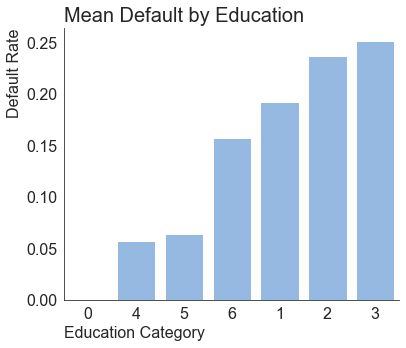

In [246]:
fig, ax1 = plt.subplots(figsize=(6,5))

sns.barplot(y=education_summary.default_payment_next_month.tolist(),
            x=[str(i) for i in education_summary.education],
            color ='#8ab8ed', ax = ax1)

ax1.set_title("Mean Default by Education ",fontsize = 20,loc = 'left')
ax1.set_ylabel("Default Rate",fontsize=16,loc = 'top')
ax1.set_xlabel("Education Category",fontsize=16,loc = 'left')
ax1.tick_params(labelsize=16)
sns.despine()
plt.show()

***we can see that our hypothesis was incorrect!*** the categories 0,4,5,6 don't have a similar behavior, and they represent outliers values when compared to other categories! therefore, we cant resume those categories into a single one. 

This chart also show us that education is probably a meaningful feature, because each category shows a different behavior. 

## Marriage

Concerning to marriage, we will check the relevance of categories and the relation with default 

In [83]:
# Lets start looking at the quantity of values in each education marriage

print(f'MARRIAGE Possible Values: {sorted(default_credit_card_3.marriage.unique())}'
      f'\n{default_credit_card_3.marriage.value_counts()}')

MARRIAGE Possible Values: [0, 1, 2, 3]
2    15964
1    13659
3      323
0       54
Name: marriage, dtype: int64


In [84]:
# Lets create a summary by marriage categorie 

marriage_summary = default_credit_card_3.groupby('marriage',as_index = False).agg({'default_payment_next_month':'mean',
                                                                                    'limit_bal':'count'})
marriage_summary.rename(columns = {'limit_bal':'qnt'},inplace = True)
marriage_summary.sort_values(by = ['default_payment_next_month'],inplace = True)
marriage_summary.reset_index(drop = True, inplace = True)
marriage_summary

,marriage,default_payment_next_month,qnt
0,0,0.092593,54
1,2,0.209283,15964
2,1,0.234717,13659
3,3,0.260062,323


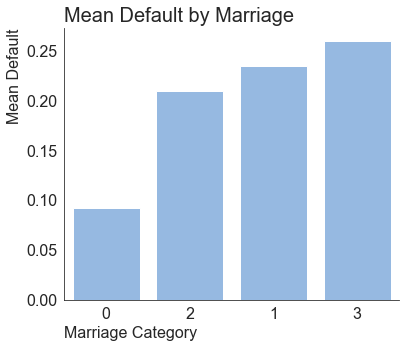

In [247]:

fig, ax1 = plt.subplots(figsize=(6,5))

sns.barplot(y=marriage_summary.default_payment_next_month.tolist(),
            x=[str(i) for i in marriage_summary.marriage],
            color ='#8ab8ed', ax = ax1)

ax1.set_title("Mean Default by Marriage ",fontsize = 20,loc = 'left')
ax1.set_ylabel("Mean Default",fontsize=16,loc ='top')
ax1.set_xlabel("Marriage Category",fontsize=16,loc = 'left')
ax1.tick_params(labelsize=16)
sns.despine()
plt.show()

This chart also show us that marriage is probably a meaningful feature, because each category shows a different behavior. 

# Feature Engineering

We have already done some feature engineering with the categorical features during the EDA. Now, we are going to take a closer look into the continuous features to see if we can retrieve more info from it.

We don't intend to do something very complex, we're just going to look for features that synthesize the values for a series of months:

+ sum values of history of past payment status (pay_1 - pay_6)
+ mean value of all bill statements (bill_amt1 - bill_amt6)
+ mean value of all previous payments (pay_amt1 - pay_amt6)

In [255]:
# Sum values of history of past payment status

default_credit_card_4 = default_credit_card_3.copy()

default_credit_card_4['sum_pay'] = default_credit_card_4.apply(
    lambda x: sum([x.pay_1,x.pay_2,x.pay_3,x.pay_4,x.pay_5,x.pay_6]),axis = 1)

default_credit_card_4.head(1)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,...,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month,age_range,age_range_int,sum_pay
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,689,0,0,0,0,1,23-25,19,-2


In [256]:
# Mean value of all bill statements

default_credit_card_4['mean_bill'] = default_credit_card_4.apply(
    lambda x: round(np.mean([x.bill_amt1 + x.bill_amt2 + x.bill_amt3 + x.bill_amt4 + x.bill_amt5 + x.bill_amt6]),3),axis = 1)

default_credit_card_4.head(1)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,...,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month,age_range,age_range_int,sum_pay,mean_bill
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,...,0,0,689,0,0,0,0,1,23-25,19,-2,7704.0


In [257]:
# Mean value of all previous payments

default_credit_card_4['mean_pay_amt'] = default_credit_card_4.apply(
    lambda x: round(np.mean([x.pay_amt1 + x.pay_amt2 + x.pay_amt3 + x.pay_amt4 + x.pay_amt5 + x.pay_amt6]),3),axis = 1)

default_credit_card_4.head(1)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,...,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month,age_range,age_range_int,sum_pay,mean_bill,mean_pay_amt
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,...,0,689,0,0,0,0,1,23-25,19,-2,7704.0,689.0


In [258]:
# Saving the treated df with new features 

default_credit_card_4.to_csv('data\default_of_credit_card_clients_treated.csv',index = False)